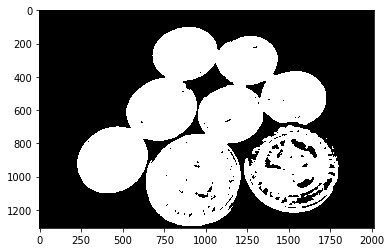

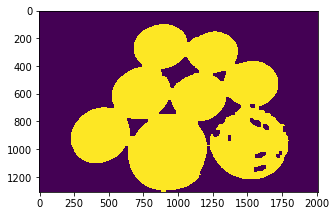

In [5]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('assets/Lab5-testCoin2.jpg')
sampleCoinGray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
sampleCoinGray = cv2.blur(sampleCoinGray,(15,15))
_,thresholdCoinImage = cv2.threshold(sampleCoinGray,0,255,cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
plt.imshow(thresholdCoinImage, cmap='gray')
plt.show()
kernel_open = cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))
kernel_close = cv2.getStructuringElement(cv2.MORPH_RECT,(21,21))

thresholdCoinImage = cv2.morphologyEx(thresholdCoinImage, cv2.MORPH_OPEN, kernel_open)
thresholdCoinImage = cv2.morphologyEx(thresholdCoinImage, cv2.MORPH_CLOSE, kernel_close)
imshow(thresholdCoinImage,(5,5))

In [6]:

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)

# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers+1

# Now, mark the region of unknown with zero
markers[unknown==255] = 0

arkers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]

In [7]:
def imshow(image,_figsize = (10,10)):
    plt.figure(figsize=_figsize)
#     img = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
#     img = image.copy()
    plt.imshow(image)
    plt.show()

In [11]:
markers.shape

(1308, 2013)